In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [62]:
df = pd.read_parquet('../../data_parquet/energy.parquet')
df_copy = df.copy()

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   id                                           35064 non-null  int64         
 1   time_hourly                                  35064 non-null  datetime64[ns]
 2   generation_biomass                           35064 non-null  int64         
 3   generation_fossil_brown_coal_lignite         35064 non-null  int64         
 4   generation_fossil_coal_derived_gas           35064 non-null  int64         
 5   generation_fossil_gas                        35064 non-null  int64         
 6   generation_fossil_hard_coal                  35064 non-null  int64         
 7   generation_fossil_oil                        35064 non-null  int64         
 8   generation_fossil_oil_shale                  35064 non-null  int64         


**Limpieza**

In [4]:
# Revisión nulos (aunque en la fase de etl ya se revisó y corrigió)
df_copy.isna().sum()

id                                             0
time_hourly                                    0
generation_biomass                             0
generation_fossil_brown_coal_lignite           0
generation_fossil_coal_derived_gas             0
generation_fossil_gas                          0
generation_fossil_hard_coal                    0
generation_fossil_oil                          0
generation_fossil_oil_shale                    0
generation_fossil_peat                         0
generation_geothermal                          0
generation_hydro_pumped_storage_consumption    0
generation_hydro_run_of_river_and_poundage     0
generation_hydro_water_reservoir               0
generation_marine                              0
generation_nuclear                             0
generation_other                               0
generation_other_renewable                     0
generation_solar                               0
generation_waste                               0
generation_wind_offs

In [5]:
df_copy.duplicated().sum() # Revisión duplicados

0

In [11]:
df_copy.describe().drop(['time_hourly', 'id'], axis=1)

generation_biomass  generation_fossil_brown_coal_lignite  \
count        35064.000000                          35064.000000   
mean           383.305727                            447.829198   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   
std             85.796305                            354.622834   

       generation_fossil_coal_derived_gas  generation_fossil_gas  \
count                             35064.0           35064.000000   
mean                                  0.0            5619.851072   
min                                   0.0               0.000000   
25%                                   0.0            4125.000000   
50%                                   0.0            4968.000000   
75%                                   0.0            6428.000000   
max                                   0.0           20034.000000   
std                                   0.0            2204.946787   

       generation_fossil_hard_coal  generation_fossil_oil  \
count                 35064.000000           35064.000000   
mean                   4253.880903             298.158139   
min                       0.000000               0.000000   
25%                    2524.750000             263.000000   
50%                    4473.000000             300.000000   
75%                    5837.000000             330.000000   
max                    8359.000000             449.000000   
std                    1963.465684              52.963429   

       generation_fossil_oil_shale  generation_fossil_peat  \
count                      35064.0                 35064.0   
mean                           0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   
std                            0.0                     0.0   

       generation_geothermal  generation_hydro_pumped_storage_consumption  \
count                35064.0                                 35064.000000   
mean                     0.0                                   475.319644   
min                      0.0                                     0.000000   
25%                      0.0                                     0.000000   
50%                      0.0                                    67.000000   
75%                      0.0                                   615.000000   
max                      0.0                                  4523.000000   
std                      0.0                                   792.269198   

       generation_hydro_run_of_river_and_poundage  \
count                                35064.000000   
mean                                   971.589351   
min                                      0.000000   
25%                                    637.000000   
50%                                    905.000000   
75%                                   1250.000000   
max                                   2000.000000   
std                                    401.307115   

       generation_hydro_water_reservoir  generation_marine  \
count                      35064.000000            35064.0   
mean                        2603.777407                0.0   
min                            0.000000                0.0   
25%                         1076.000000                0.0   
50%                         2163.000000                0.0   
75%                         3756.250000                0.0   
max                         9728.000000                0.0   
std          

**Distribuciónes**

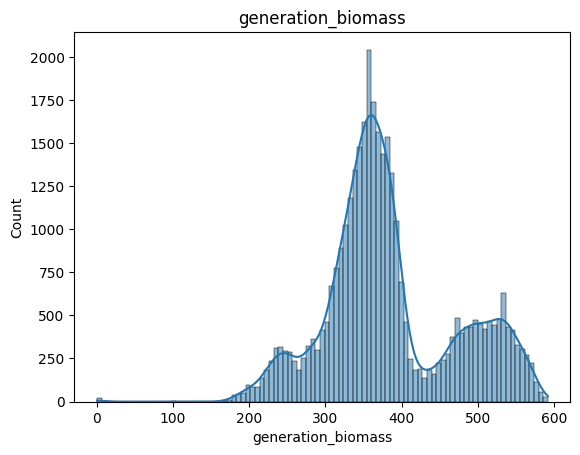

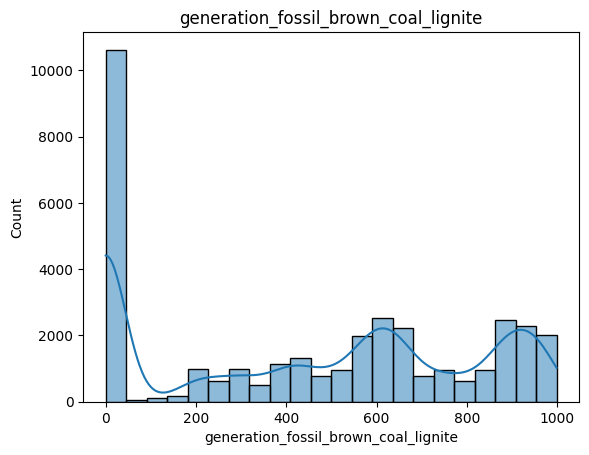

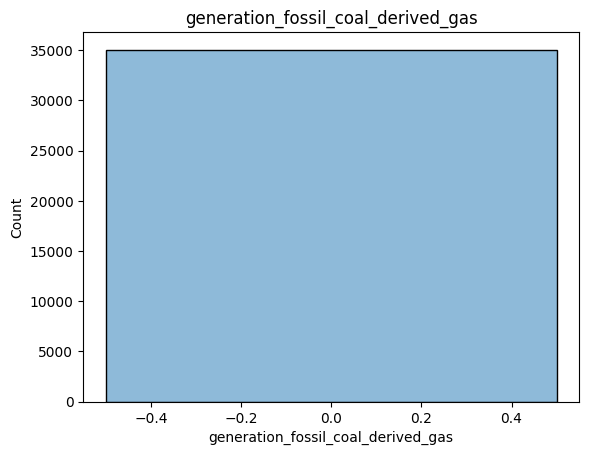

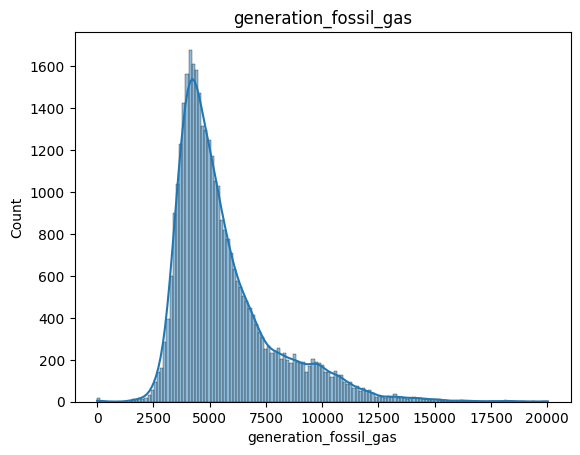

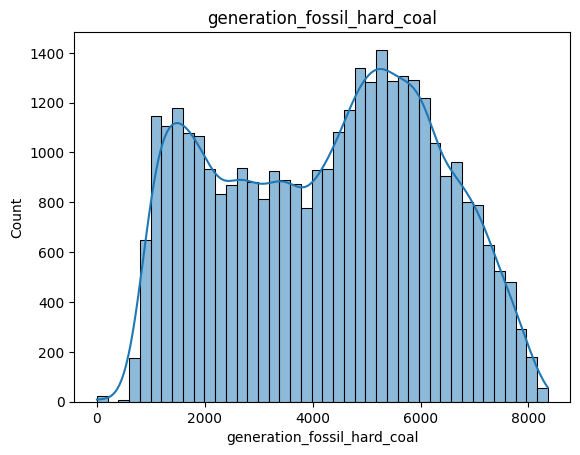

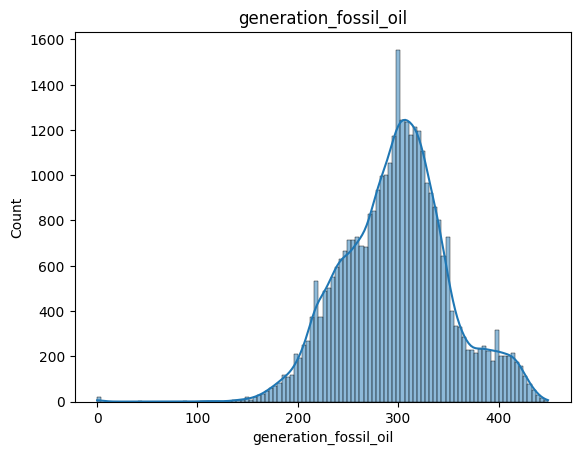

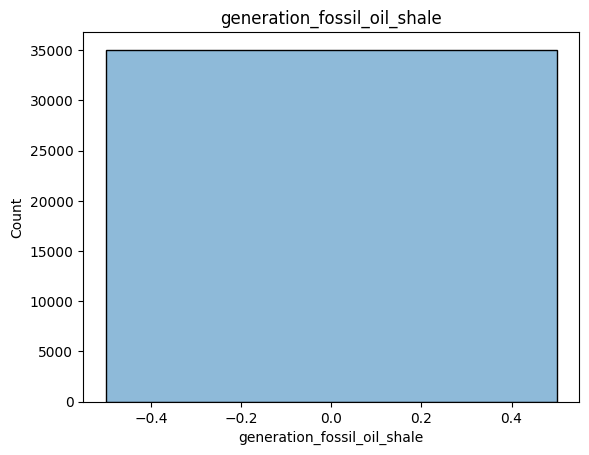

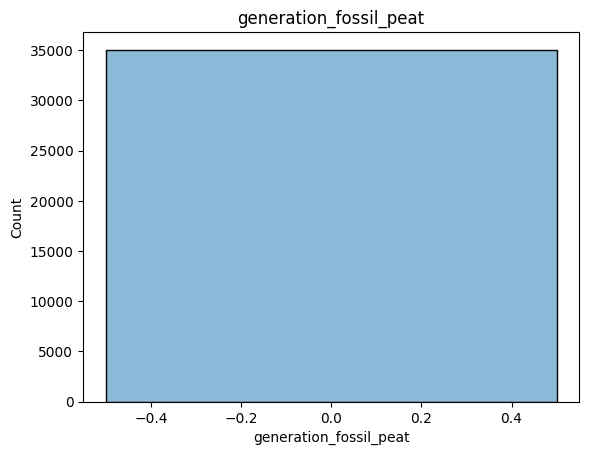

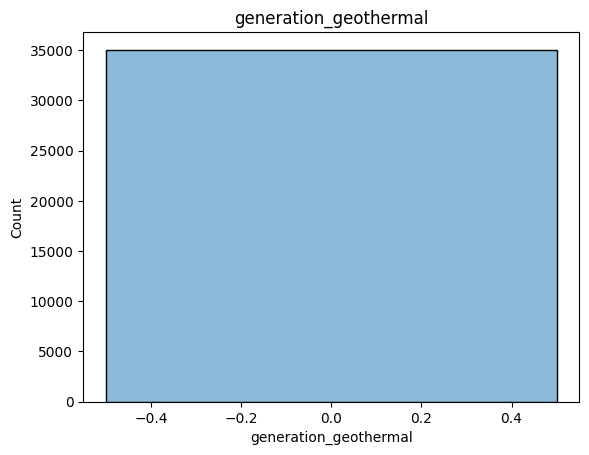

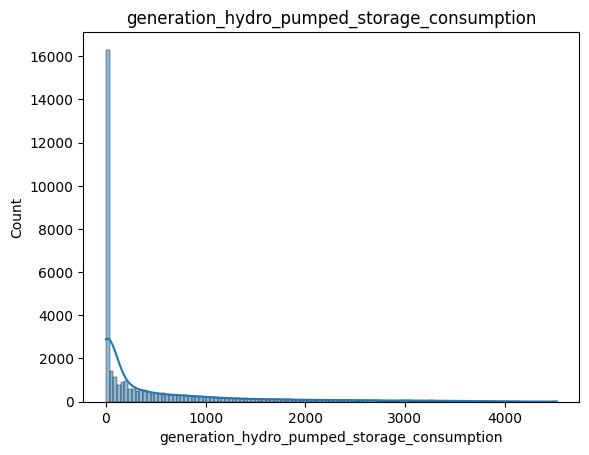

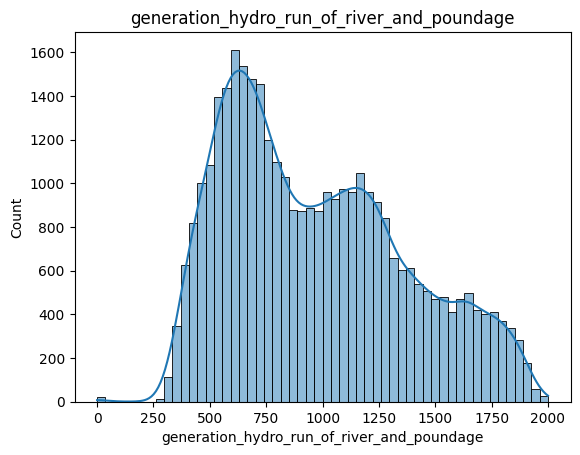

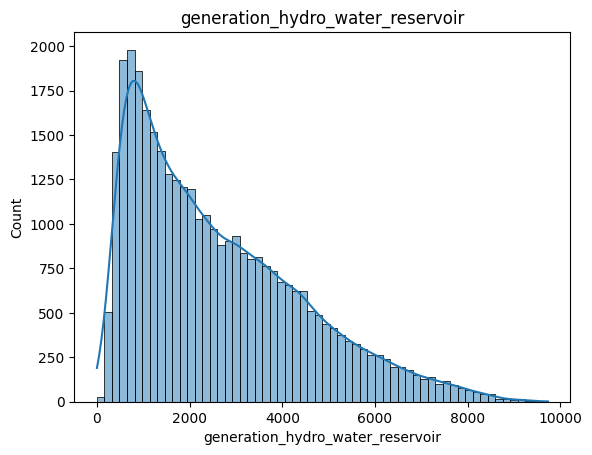

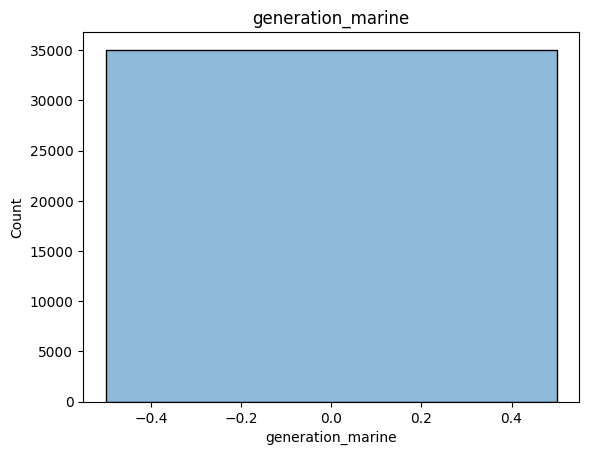

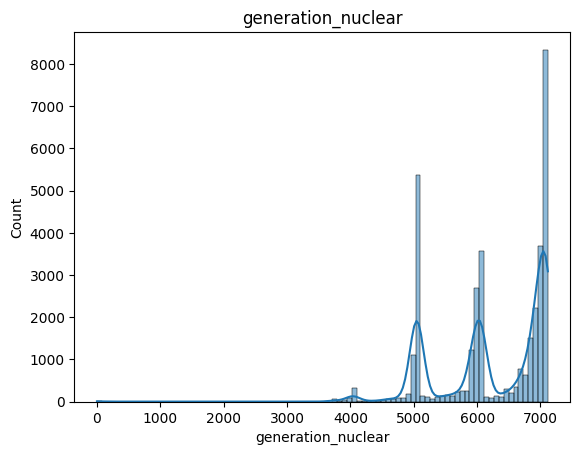

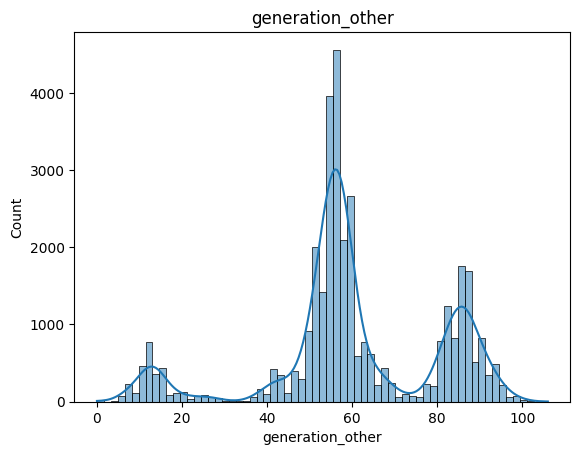

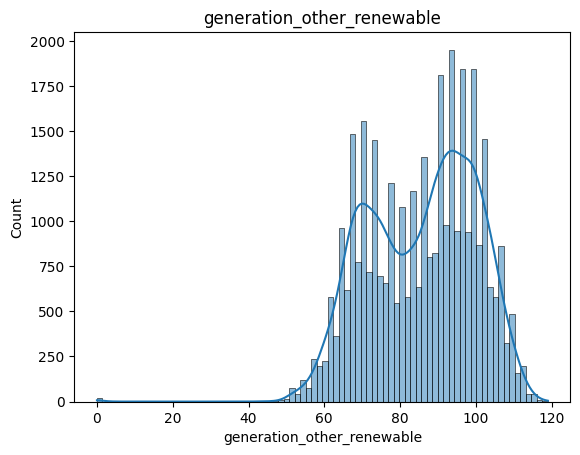

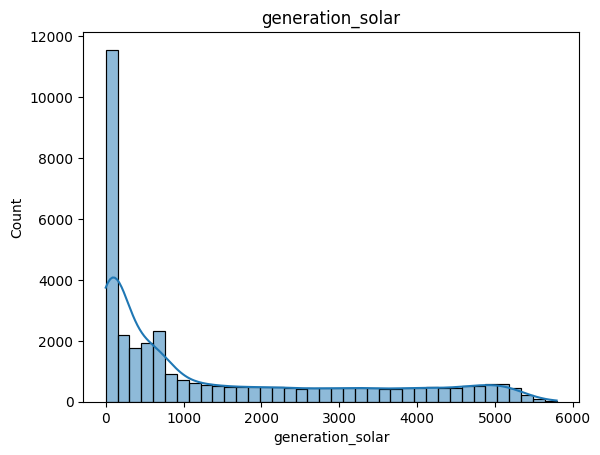

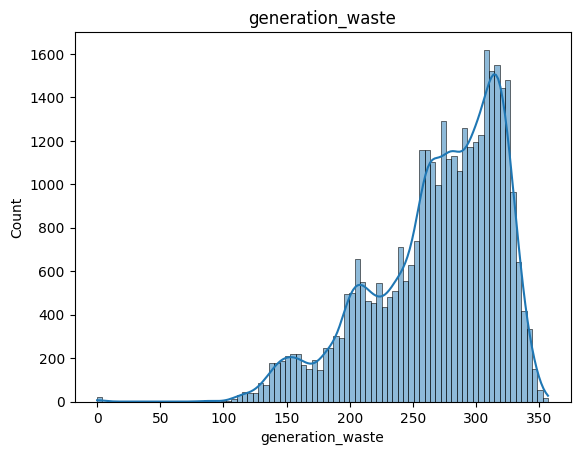

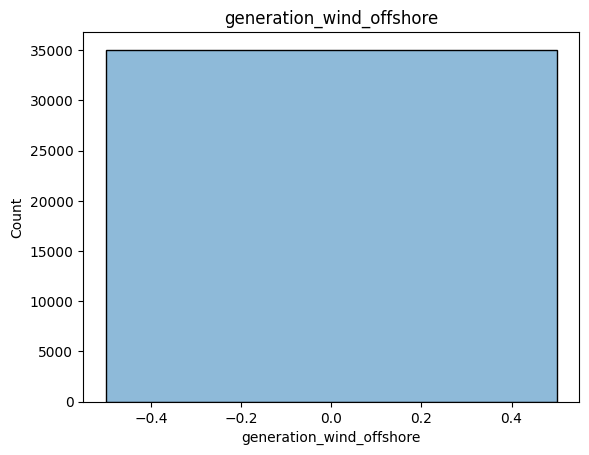

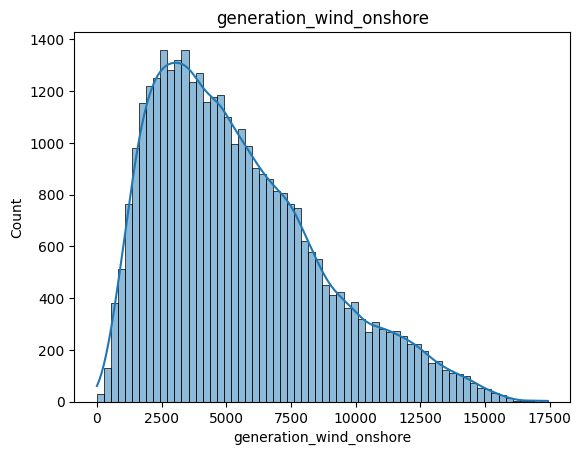

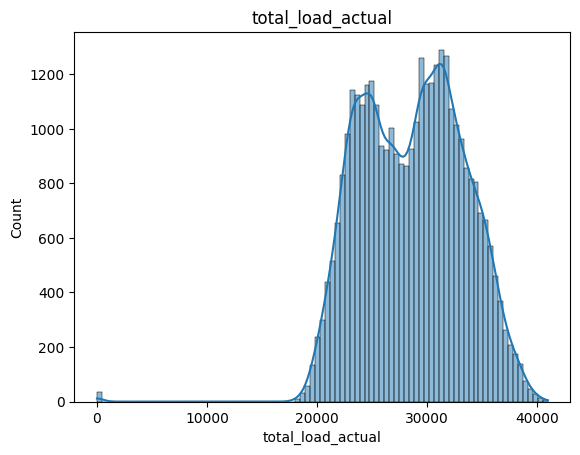

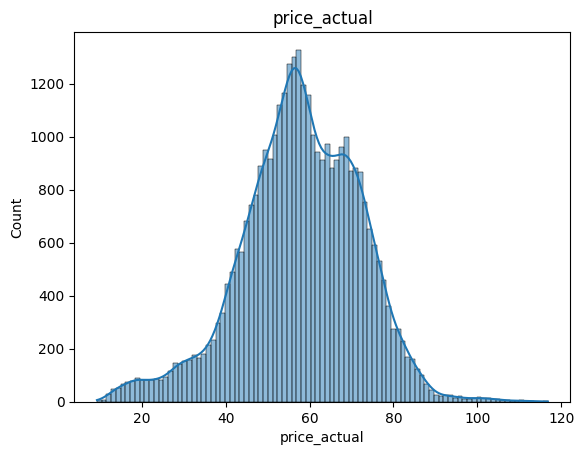

In [18]:
hist_columns = df_copy.drop(['time_hourly', 'id'], axis=1)
for col in hist_columns.columns:
    sns.histplot(data=hist_columns, x=col, kde=True)
    plt.title(col)
    plt.show()


Eliminamos variables: generation_fossil_coal_derived_gas, generation_fossil_oil_shale, generation_fossil_peat, generation_geothermal,
generation_marine, generation_wind_offshore.

Presentan valores 0 en todos los registros.

In [63]:
drop_columns = ['generation_fossil_coal_derived_gas','generation_fossil_oil_shale',
                'generation_fossil_peat', 'generation_geothermal', 'generation_marine','generation_wind_offshore']
df_copy.drop(drop_columns, axis=1, inplace=True)

**Correlaciones**

<Axes: >

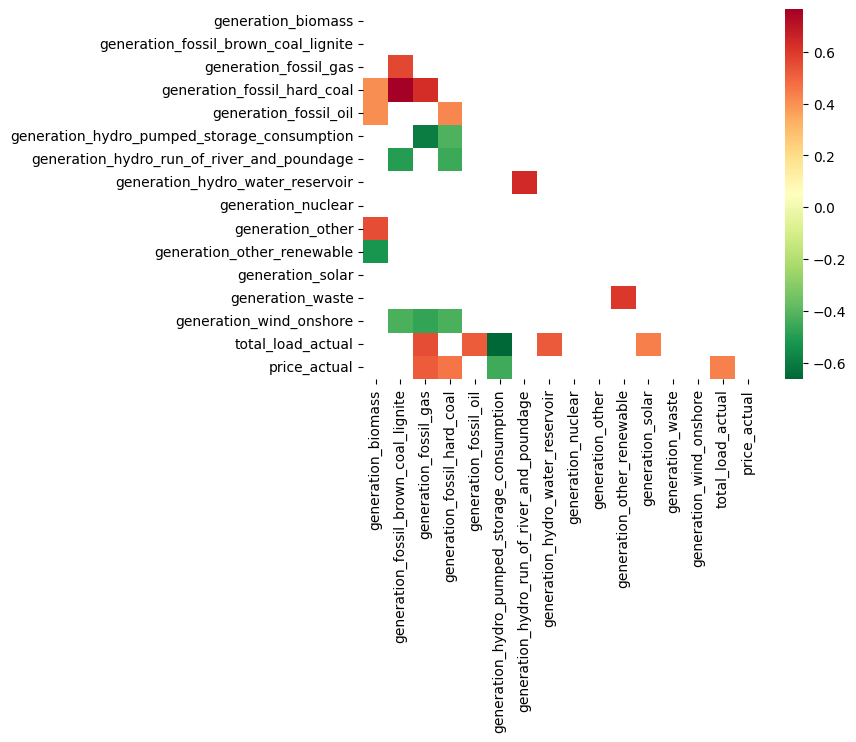

In [4]:
# Correlacion entre características
columns = df_copy.drop(['time_hourly', 'id'], axis=1).corr('spearman')
mask = np.triu(np.ones_like(columns, dtype=bool)) | ((np.abs(columns) <= 0.4) & (np.abs(columns) >= -0.4))
sns.heatmap(columns, mask=mask, cmap='RdYlGn_r', annot=False)

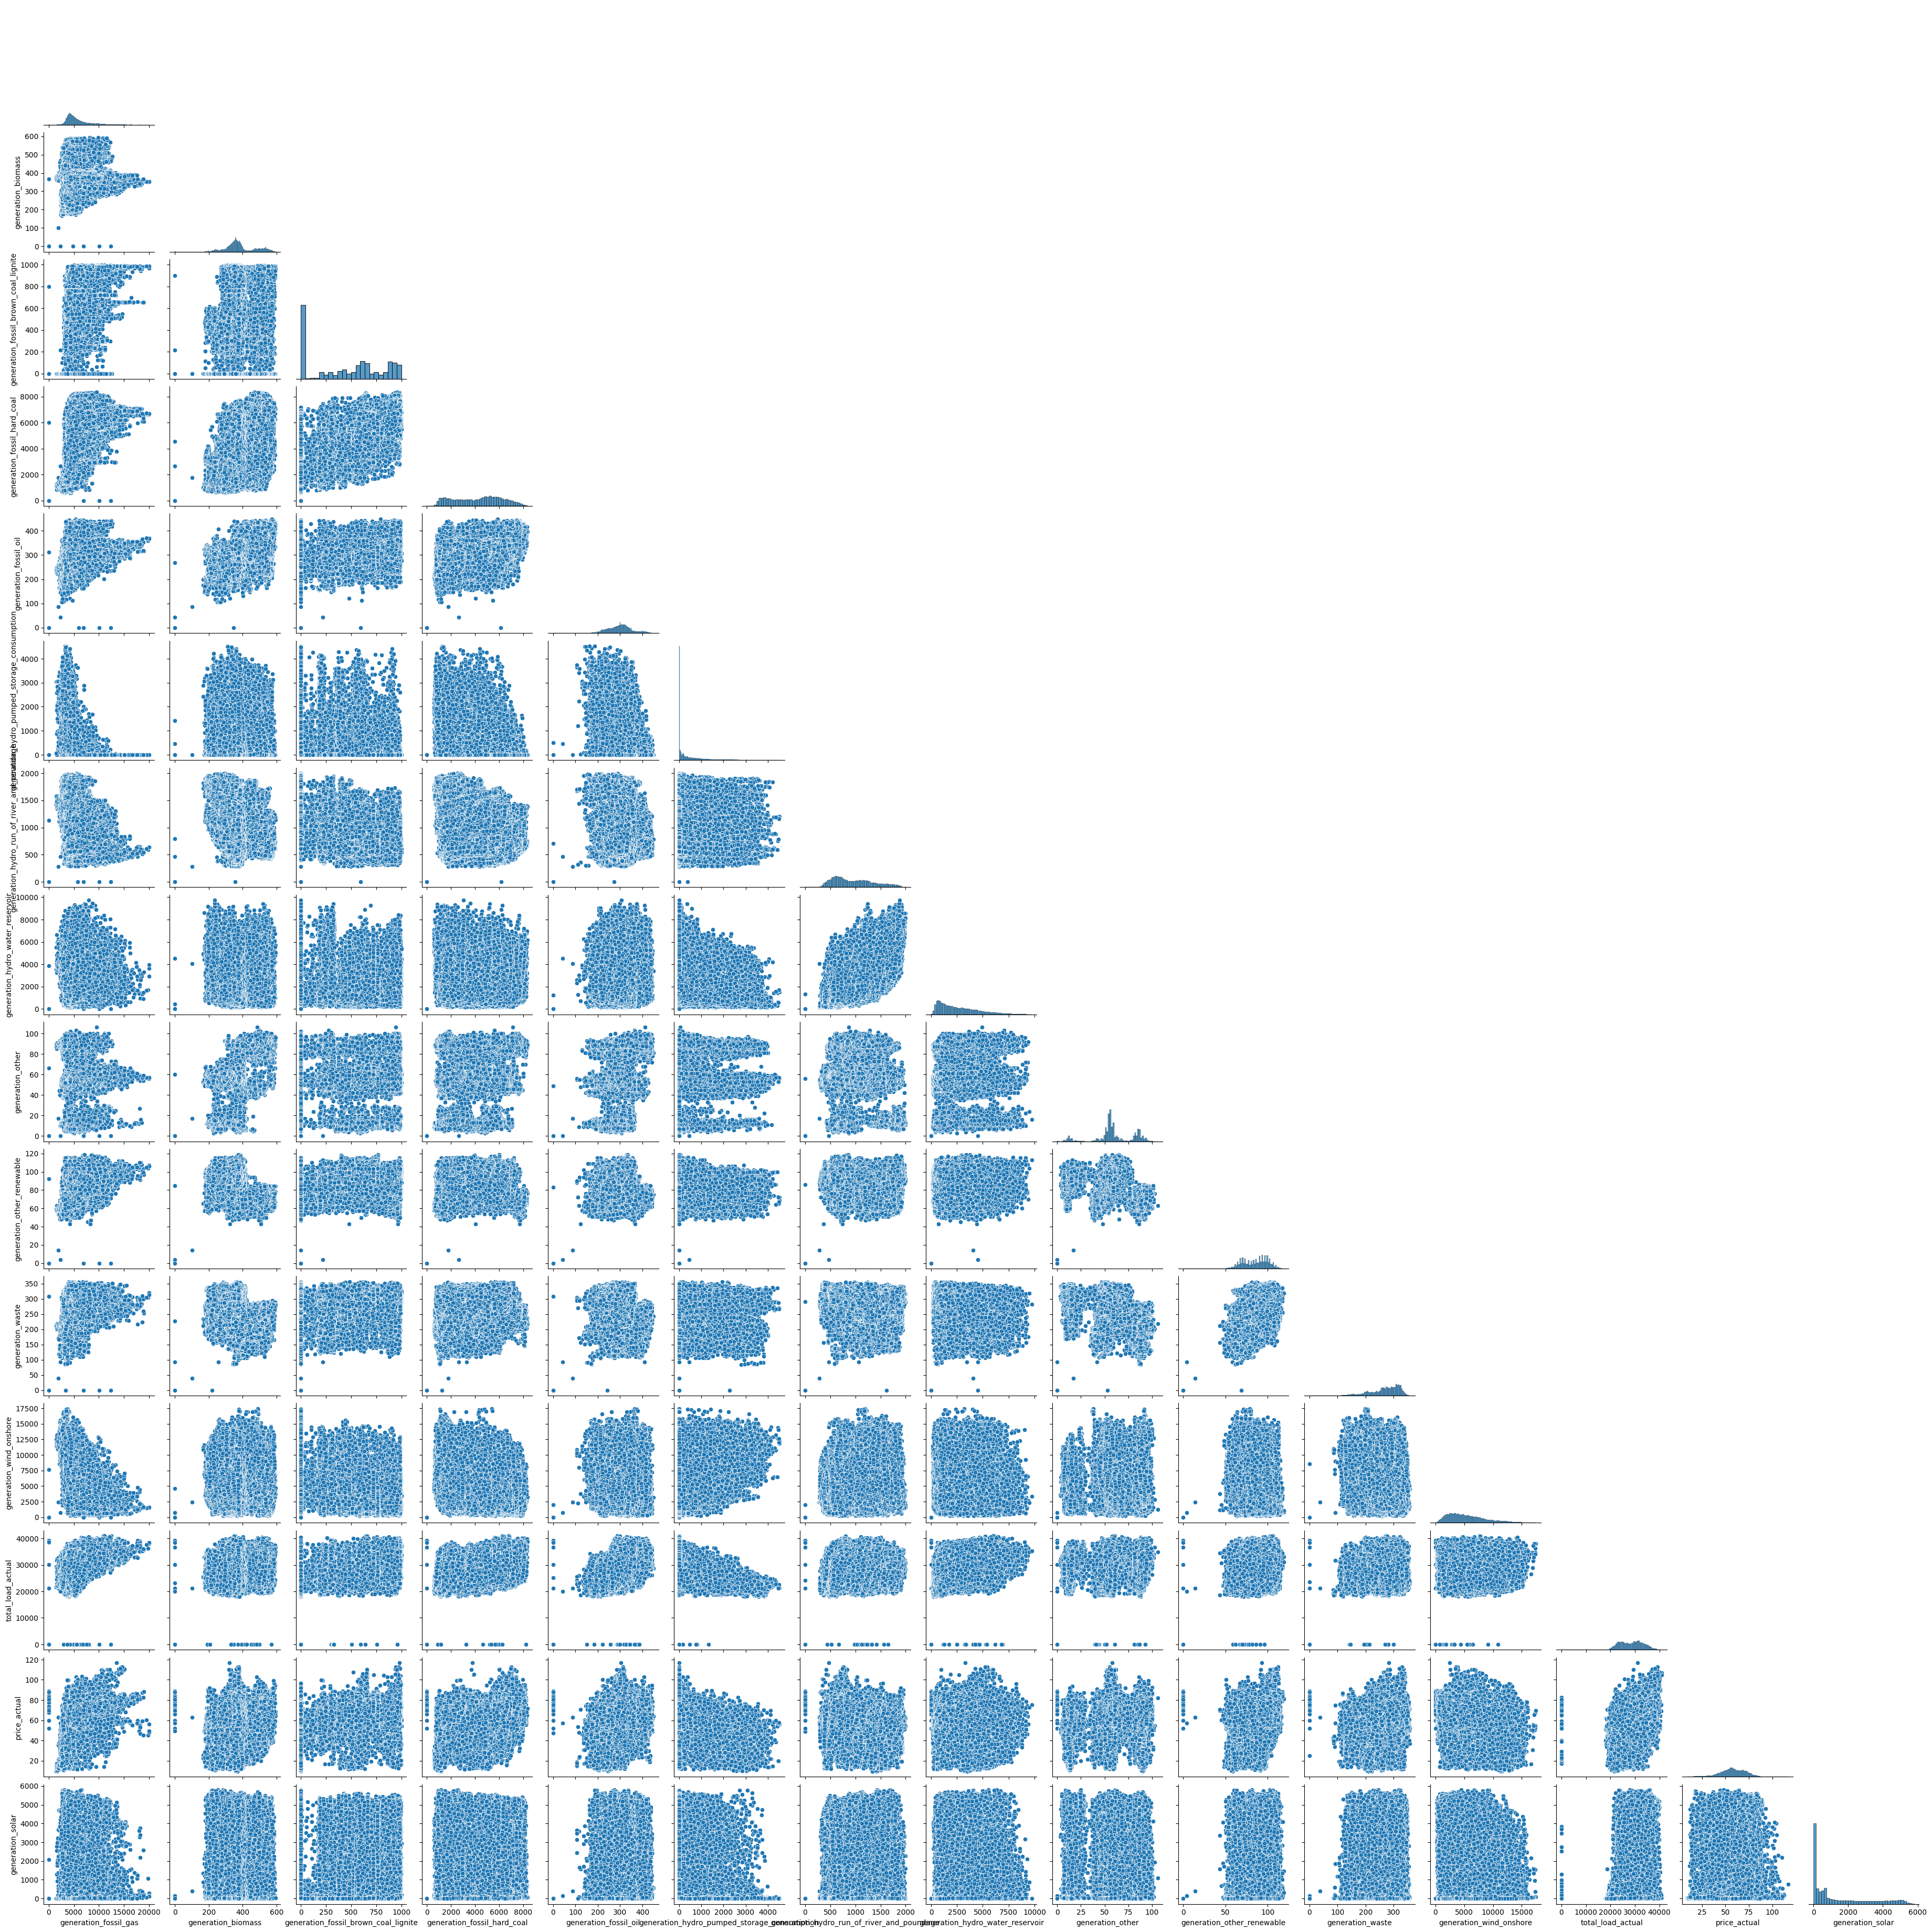

In [5]:
# gráfico de dispersión sobre correlaciones mas fuertes.
columns_pairplot= ['generation_fossil_gas','generation_biomass','generation_fossil_brown_coal_lignite',
                   'generation_fossil_hard_coal','generation_fossil_oil',
                   'generation_hydro_pumped_storage_consumption','generation_hydro_run_of_river_and_poundage',
                   'generation_hydro_water_reservoir','generation_other','generation_other_renewable',
                   'generation_waste','generation_wind_onshore','total_load_actual','price_actual', 'generation_solar']
pair_plot = df_copy[columns_pairplot]

sns.pairplot(pair_plot, corner=True)

**Análisis por grupos**

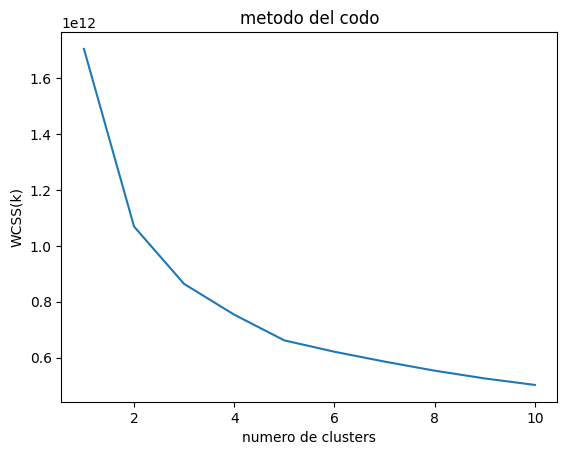

In [4]:
# Método del codo (Observamos cuantos clusteres necesitaremos)
x_kmeans = df_copy.drop(['time_hourly', 'id'], axis=1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_kmeans.values)
    #añadimos al final de wcss el sumatorio de los cuadrados de la distancia de k (inertia_)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('metodo del codo')
plt.xlabel('numero de clusters')
plt.ylabel('WCSS(k)')
plt.show()

In [64]:
# Extraer los clusteres
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x_kmeans)

In [65]:
x_kmeans['Cluster'] = y_kmeans
counter = x_kmeans['Cluster'].value_counts()

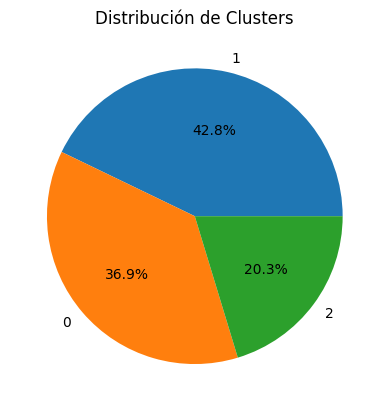

In [66]:
plt.pie(counter, labels = counter.index, autopct='%1.1f%%')
plt.title('Distribución de Clusters')
plt.show()

In [67]:
# Reducción de dimensionalidad a 2 dimensiones
pca = PCA(n_components=0.75)
X_reduced = pca.fit_transform(x_kmeans.drop('Cluster', axis = 1))

In [68]:
pca_df = pd.DataFrame(data = X_reduced, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = x_kmeans['Cluster']

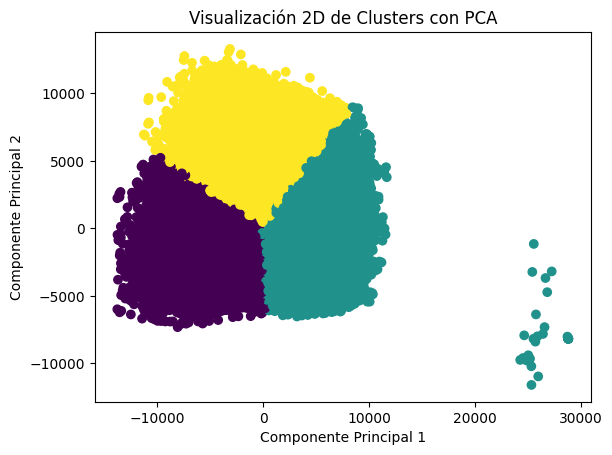

In [69]:
# Gráfico en 2D según clusteres
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'])

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('Visualización 2D de Clusters con PCA')
plt.show()

In [70]:
# Características en funcion de cada cluster (Observamos la representatividad de cada columna en funcion de los grupos)
centroids = x_kmeans.groupby('Cluster').mean()

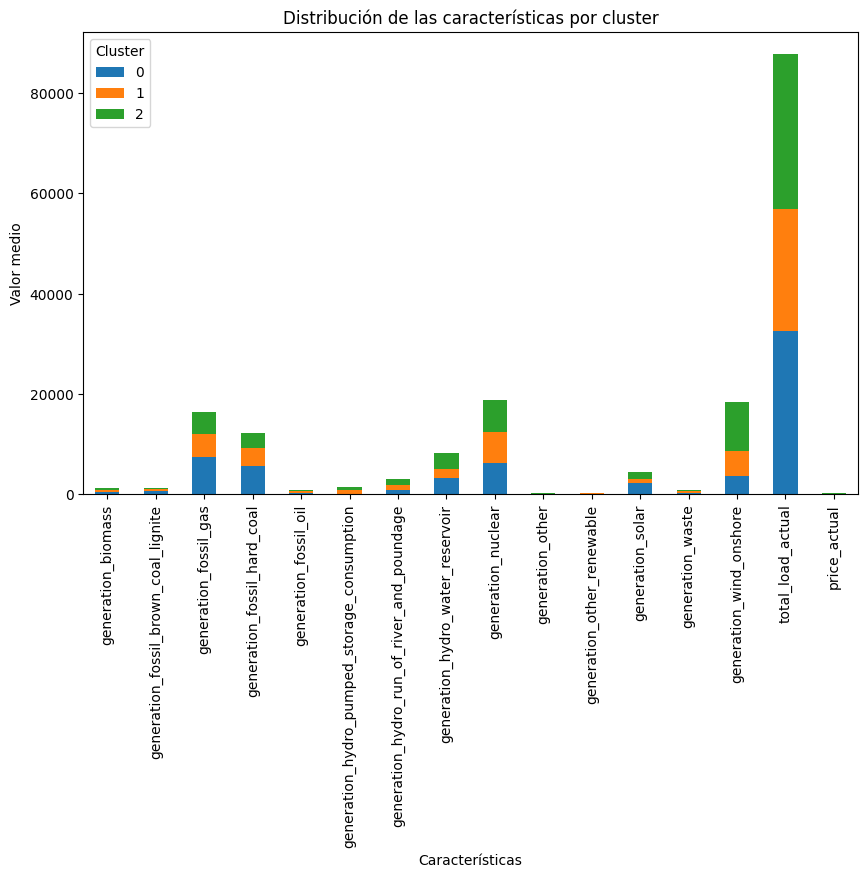

In [71]:
centroids.transpose().plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Distribución de las características por cluster')
plt.xlabel('Características')
plt.ylabel('Valor medio')
plt.show()

In [72]:
centroids_c0 = x_kmeans[x_kmeans['Cluster']==0].mean().sort_values(ascending=False)
centroids_c1 = x_kmeans[x_kmeans['Cluster']==1].mean().sort_values(ascending=False)
centroids_c2 = x_kmeans[x_kmeans['Cluster']==2].mean().sort_values(ascending=False)

In [98]:
df_clusters = pd.DataFrame({
    'cluster_0':centroids_c0,
    'cluster_1':centroids_c1,
    'cluster_2':centroids_c2
})

In [102]:
df_clusters.sort_values(by=['cluster_0','cluster_1', 'cluster_2'],ascending=False, inplace=True)

In [115]:
# Seleccionar las seis características más importantes para cada clúster
top_features_0 = df_clusters['cluster_0'].nlargest(6)
top_features_1 = df_clusters['cluster_1'].nlargest(6)
top_features_2 = df_clusters['cluster_2'].nlargest(6)

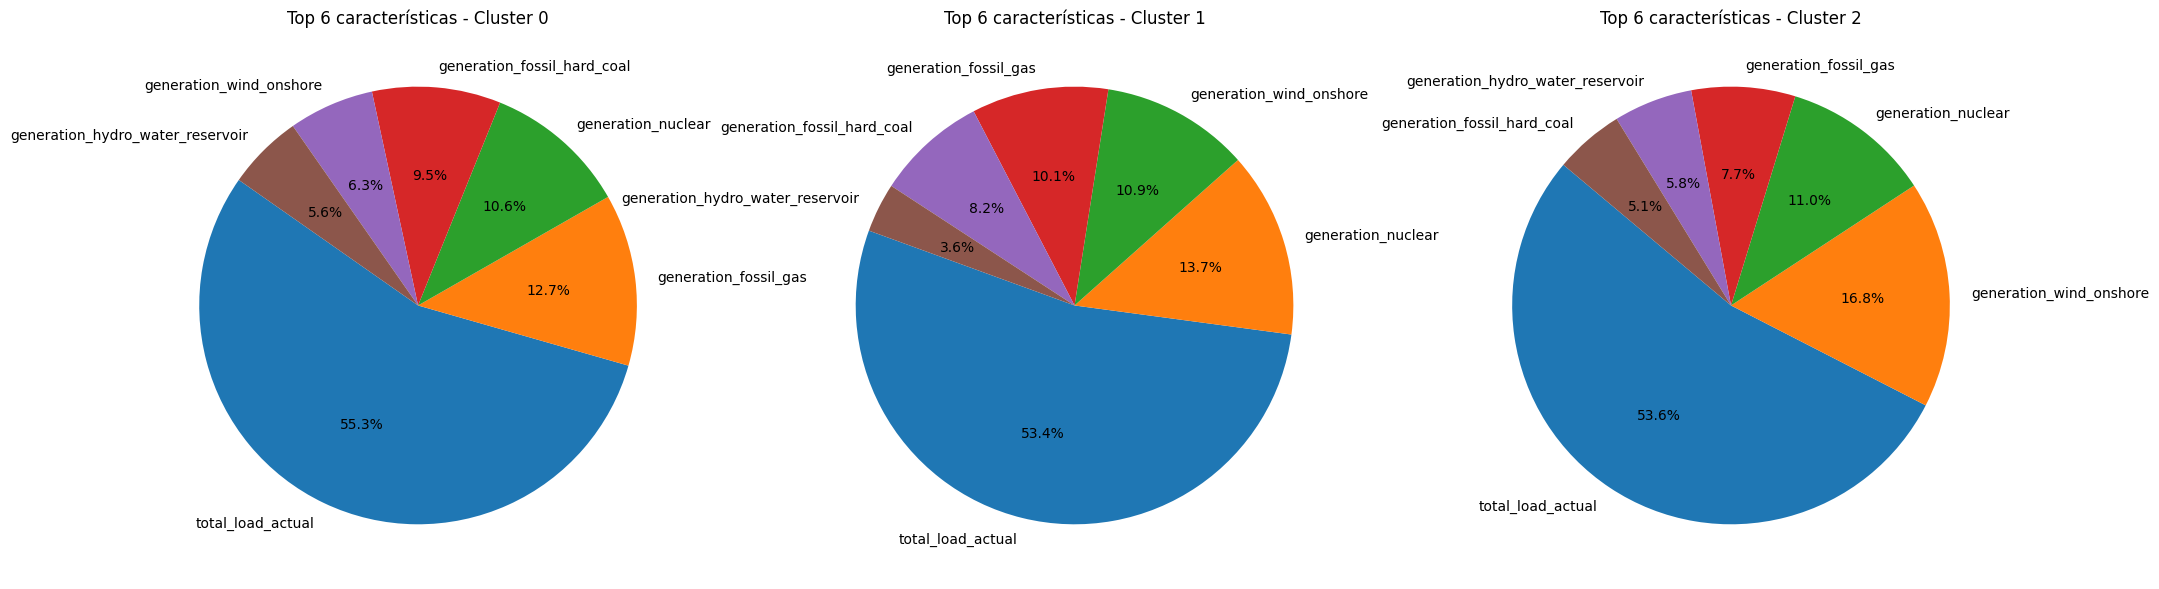

In [116]:
# Crear gráficos circulares para cada clúster
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

axs[0].pie(top_features_0, labels=top_features_0.index, autopct='%1.1f%%', startangle=145)
axs[0].set_title('Top 6 características - Cluster 0')

axs[1].pie(top_features_1, labels=top_features_1.index, autopct='%1.1f%%', startangle=160)
axs[1].set_title('Top 6 características - Cluster 1')

axs[2].pie(top_features_2, labels=top_features_2.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Top 6 características - Cluster 2')

plt.show()

Podemos identificar estos tres clusteres como:

- Cluster 0: Mix Energético Alto en demanda y Fósil-gas.
- Cluster 1: Mix Energético Nuclear y Renovable-eólica.
- Cluster 2: Mix Energético Alto en Renovables

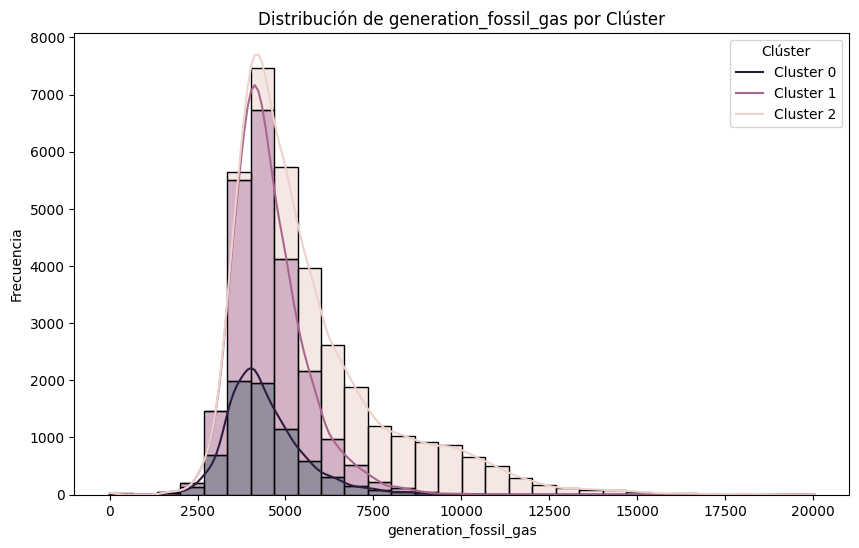

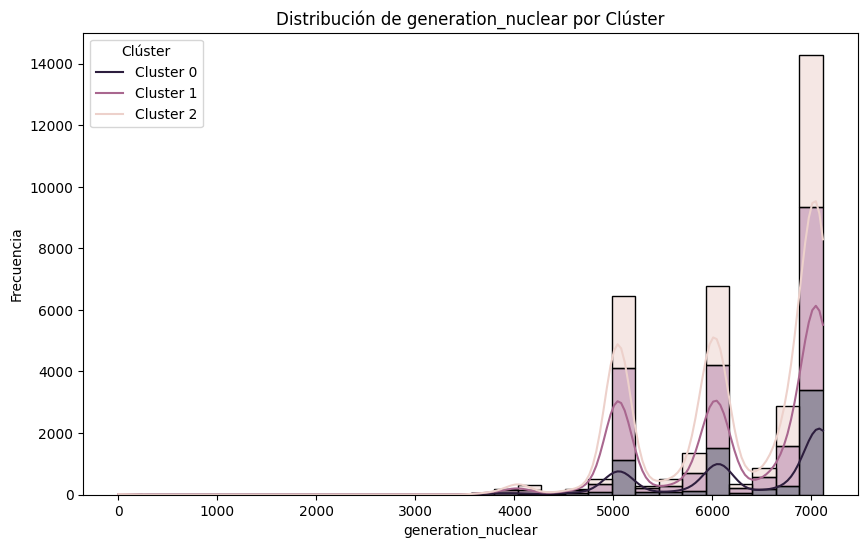

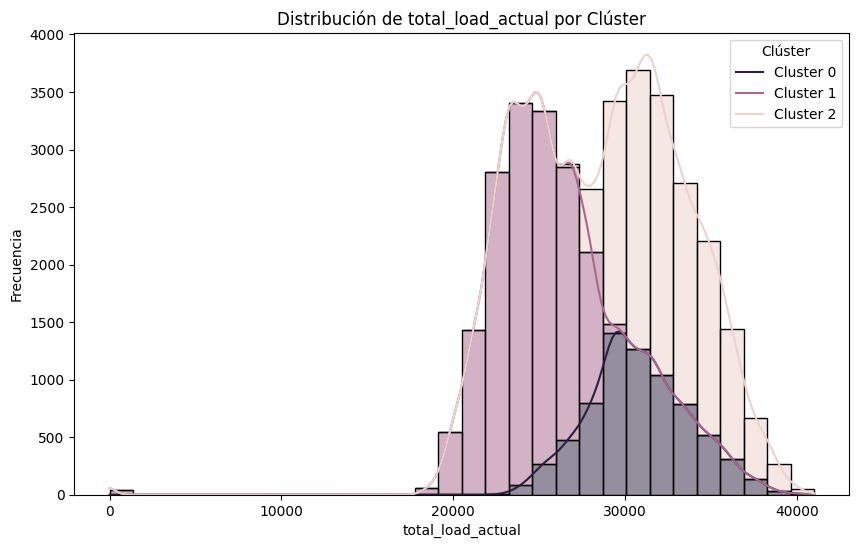

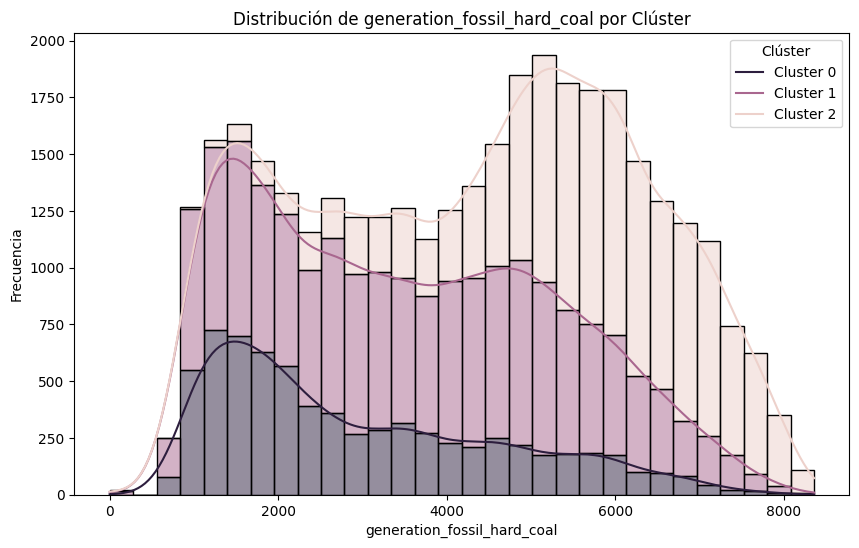

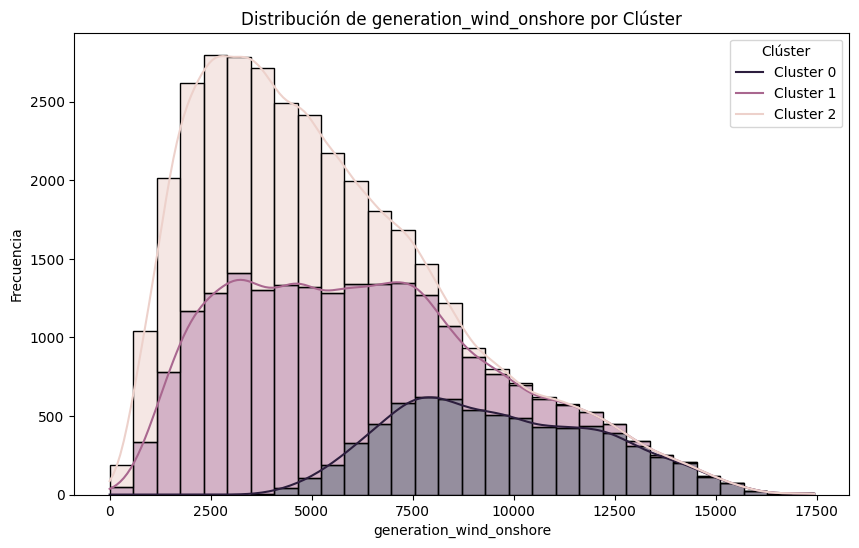

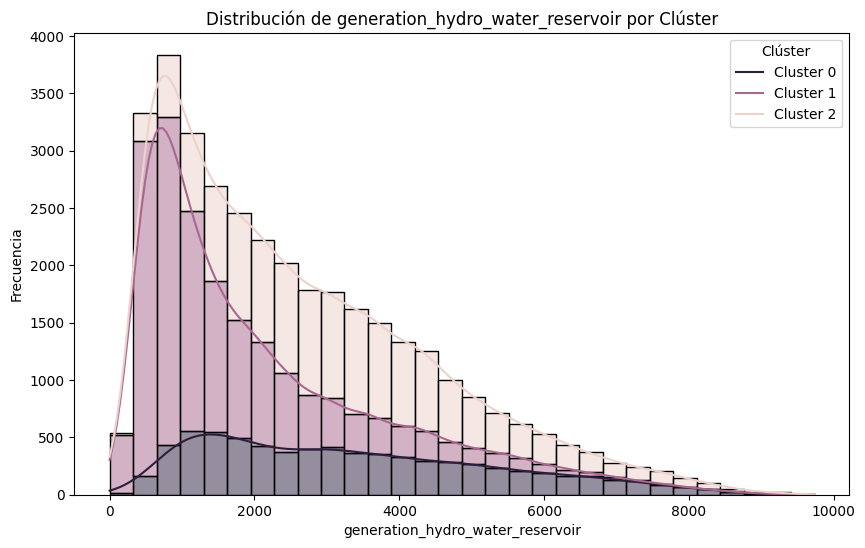

In [122]:
# Crear una figura
features = [
    'generation_fossil_gas', 'generation_nuclear', 'total_load_actual',
    'generation_fossil_hard_coal', 'generation_wind_onshore', 'generation_hydro_water_reservoir'
]

for feature in features:
    plt.figure(figsize=(10, 6))

    # Dibujar el histograma de 'total_load_actual' coloreado por clúster
    sns.histplot(data=x_kmeans, x=feature, hue='Cluster', multiple='stack', bins=30, kde=True)

    # Títulos y etiquetas
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend(title='Clúster', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
    plt.show()